<a href="https://colab.research.google.com/github/HariiAravinth/Diabetes-Prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Set

In [10]:
df = pd.read_csv("/content/diabetes.csv")

# Exploratory Data Analysis

In [11]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [13]:
df.shape

(768, 9)

Renaming the Columns

In [14]:
df = df.rename(columns = {"Pregnancies": "pregnancies", "Glucose": "glucose", "BloodPressure": "blood pressure", "SkinThickness": "skinthickness", "Insulin" : "insulin","DiabetesPedigreeFunction" : "dpf", "Age" : "age"})

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape)

Number of duplicate rows: (0, 9)


In [16]:
df.head(10)

,pregnancies,glucose,blood pressure,skinthickness,insulin,BMI,dpf,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Checking for NULL values

In [17]:
print(df.isnull().sum())


pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


Columns where zero values are misleading

In [18]:
invalid_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

#df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

print(df.isnull().sum())


pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


Box Plots for  Visual Outlier Detection

<Axes: xlabel='pregnancies'>

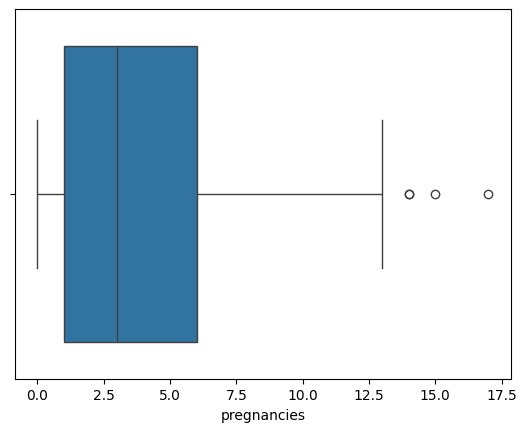

In [19]:
sns.boxplot(x = df['pregnancies'])

<Axes: xlabel='glucose'>

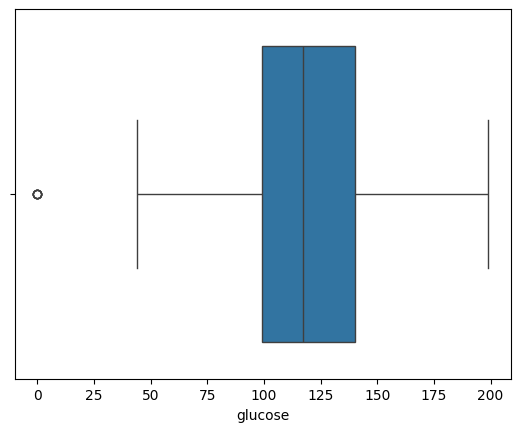

In [20]:
sns.boxplot(x = df['glucose'])


<Axes: xlabel='dpf'>

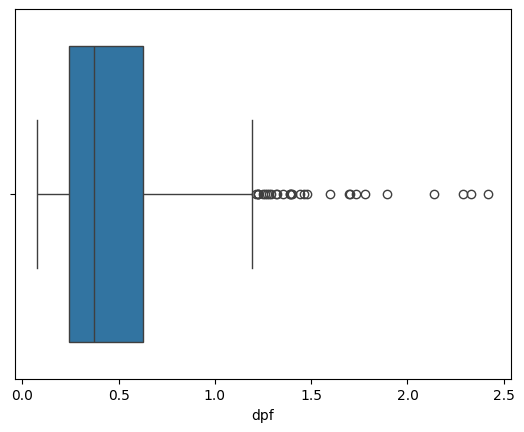

In [21]:
sns.boxplot(x = df['dpf'])

Z score outlier removal

In [22]:
import statistics

df['z_score'] = np.abs(stats.zscore(df['dpf']))

# Remove outliers (e.g., threshold of 3)
df= df[df['z_score'] < 3].drop(columns=['z_score'])
print("\nDataFrame after Z-score outlier removal:")
print(df)


DataFrame after Z-score outlier removal:
     pregnancies  glucose  blood pressure  skinthickness  insulin   BMI  \
0              6      148              72             35        0  33.6   
1              1       85              66             29        0  26.6   
2              8      183              64              0        0  23.3   
3              1       89              66             23       94  28.1   
5              5      116              74              0        0  25.6   
..           ...      ...             ...            ...      ...   ...   
763           10      101              76             48      180  32.9   
764            2      122              70             27        0  36.8   
765            5      121              72             23      112  26.2   
766            1      126              60              0        0  30.1   
767            1       93              70             31        0  30.4   

       dpf  age  Outcome  
0    0.627   50        1  
1  

Applying Simple imputer

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace 0 with NaN for features known to be missing
X = df.copy()
X[['insulin', 'skinthickness']] = X[['insulin', 'skinthickness']].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X[['insulin', 'skinthickness']] = imputer.fit_transform(X[['insulin', 'skinthickness']])


In [24]:
# 1. Calculate IQR
Q1 = df['dpf'].quantile(0.25)
Q3 = df['dpf'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter out outliers
df = df[(df['dpf'] >= lower_bound) & (df['dpf'] <= upper_bound)]

print("DataFrame after IQR-based outlier removal:")
print(df.shape)

DataFrame after IQR-based outlier removal:
(733, 9)


<Axes: xlabel='dpf'>

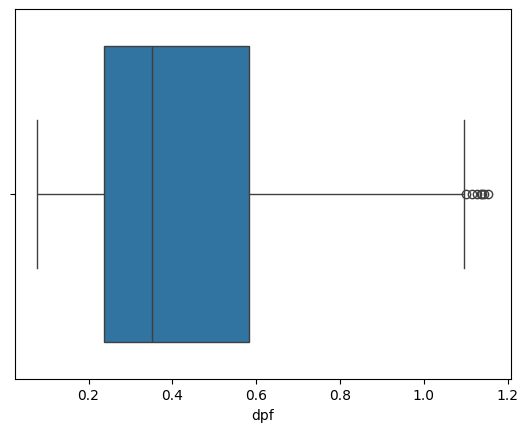

In [25]:
sns.boxplot(x = df['dpf'])

In [26]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd

Splitting Training and Test Data

In [27]:
X = df[['pregnancies','glucose','blood pressure','skinthickness','insulin','dpf','age']]
y = df['Outcome']

In [28]:
df.describe


<bound method NDFrame.describe of      pregnancies  glucose  blood pressure  skinthickness  insulin   BMI  \
0              6      148              72             35        0  33.6   
1              1       85              66             29        0  26.6   
2              8      183              64              0        0  23.3   
3              1       89              66             23       94  28.1   
5              5      116              74              0        0  25.6   
..           ...      ...             ...            ...      ...   ...   
763           10      101              76             48      180  32.9   
764            2      122              70             27        0  36.8   
765            5      121              72             23      112  26.2   
766            1      126              60              0        0  30.1   
767            1       93              70             31        0  30.4   

       dpf  age  Outcome  
0    0.627   50        1  
1    0.351   31        0  
2    0.672   32        1  
3    0.167   21        0  
5    0.201   30        0  
..     ...  ...      ...  
763  0.171   63        0  
764  0.340   27        0  
765  0.245   30        0  
766  0.349   47        1  
767  0.315   23        0  

[733 rows x 9 columns]>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")



Training data shape: X_train=(586, 7), y_train=(586,)
Testing data shape: X_test=(147, 7), y_test=(147,)


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [31]:
# Replace 0s with np.nan for medically invalid features
missing_as_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

df[missing_as_zero_cols] = df[missing_as_zero_cols].replace(0, np.nan)


Fair Cut Imputation

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def faircut_impute(df, strategy="mean", max_depth=5, reduce_to_6=True, target_col="Outcome"):
    """
    FairCut Tree Imputer with dimension reduction support.

    Parameters:
        df (pd.DataFrame): DataFrame with numeric features and target.
        strategy (str): Strategy for SimpleImputer fallback ('mean' or 'median').
        max_depth (int): Max depth of decision tree regressor.
        reduce_to_6 (bool): Whether to drop one feature to keep only 6.
        target_col (str): Name of the target column to exclude from imputation.

    Returns:
        pd.DataFrame: Imputed DataFrame with 6 features + target.
    """
    df_imputed = df.copy()
    numeric_cols = df_imputed.select_dtypes(include=np.number).columns.drop(target_col)

    for col in numeric_cols:
        if df_imputed[col].isnull().sum() == 0:
            continue

        train_data = df_imputed[df_imputed[col].notnull()]
        missing_data = df_imputed[df_imputed[col].isnull()]

        if len(missing_data) == 0 or len(train_data) < 10:
            # Fallback: too few rows
            median_value = df_imputed[col].median()
            df_imputed[col].fillna(median_value, inplace=True)
            continue

        try:
            X_train = train_data.drop(columns=[col, target_col])
            y_train = train_data[col]

            # Handle remaining missing in X
            if X_train.isnull().sum().sum() > 0:
                X_train = SimpleImputer(strategy=strategy).fit_transform(X_train)

            tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
            tree.fit(X_train, y_train)

            X_missing = missing_data.drop(columns=[col, target_col])
            if X_missing.isnull().sum().sum() > 0:
                X_missing = SimpleImputer(strategy=strategy).fit_transform(X_missing)

            imputed_values = tree.predict(X_missing)
            df_imputed.loc[df_imputed[col].isnull(), col] = imputed_values

        except Exception as e:
            # Fallback on failure
            median_value = df_imputed[col].median()
            df_imputed[col].fillna(median_value, inplace=True)
            print(f"[Fallback on {col}] Reason: {e}")

    # Optional: Reduce features to 6
    if reduce_to_6:
        # Recommended 6 based on SHAP/TabNet/clinical insight
        keep_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
        if all(col in df_imputed.columns for col in keep_cols):
            df_imputed = df_imputed[keep_cols + [target_col]]
        else:
            print("Warning: Not all selected columns present. Skipping reduction.")

    return df_imputed


In [6]:
df_faircut = faircut_impute(df)
df_faircut.head(10)

X_faircut = df_faircut.drop("Outcome", axis=1).values.astype(np.float32)
y_faircut = df_faircut["Outcome"].values.astype(np.float32)

X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut = train_test_split(
    X_faircut, y_faircut, test_size=0.2, stratify=y_faircut, random_state=42
)

Standard Scaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Smote

In [35]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns #

Installing SHAP

In [37]:
!pip install shap
import shap




# Implementation of Traditional Models

Logistic Regression

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Adjust path if needed

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
ROC AUC Score: 0.8128558310376492


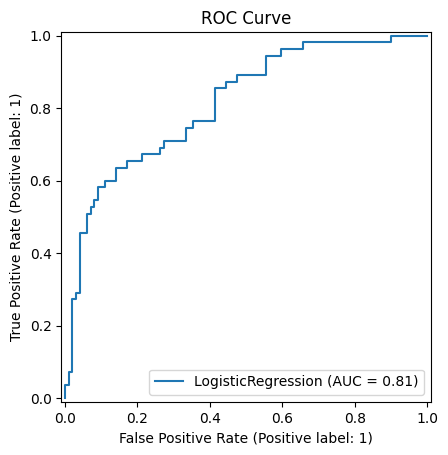

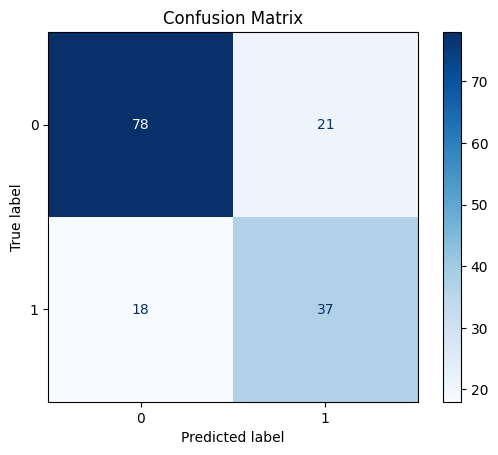

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


SHAP Global Feature Importance (Bar Plot):


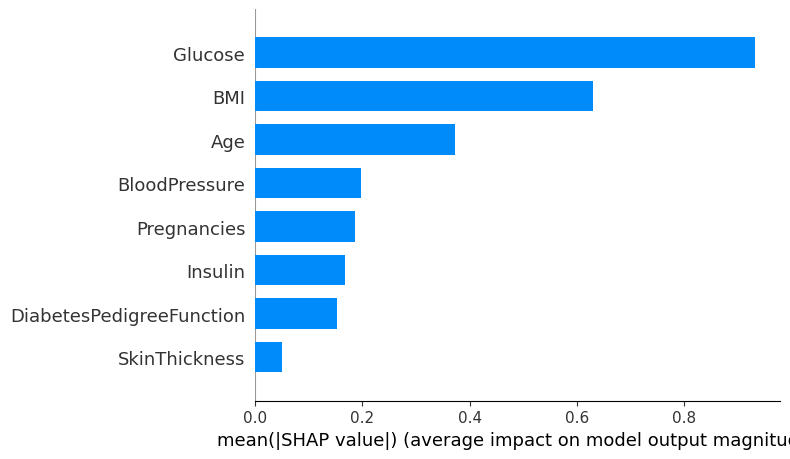


SHAP Detailed Summary Plot (Beeswarm):


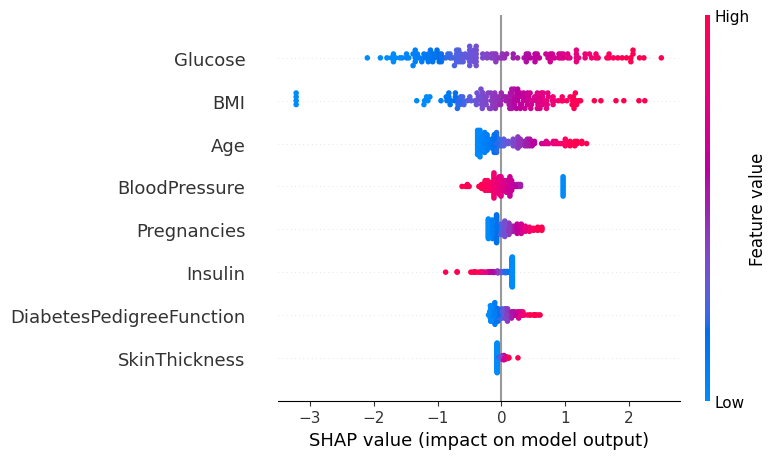


SHAP Waterfall Plot for a Single Prediction:


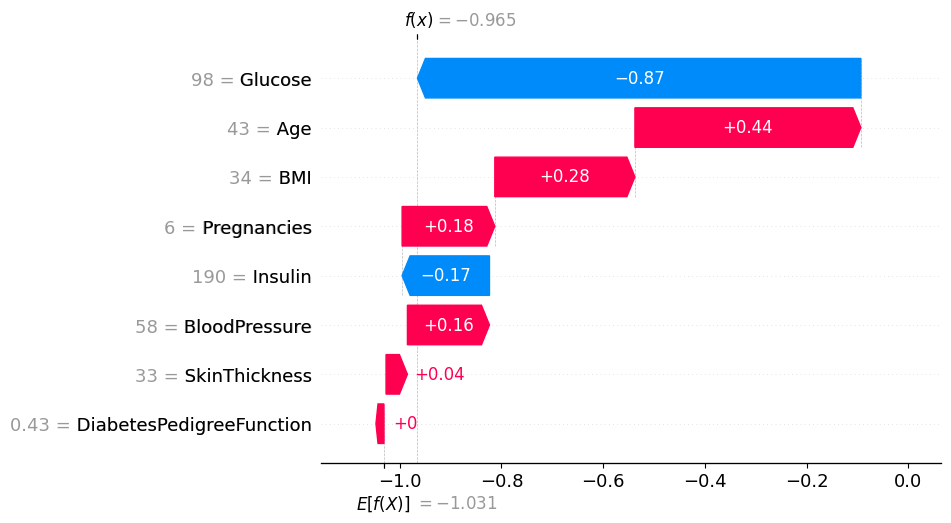

In [40]:
explainer = shap.Explainer(model, X_train)

# 2. Calculate SHAP values for the test data
shap_values = explainer(X_test)

# 3. Visualize the results

# Global Feature Importance (Bar Plot)
print("SHAP Global Feature Importance (Bar Plot):")
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# Detailed Summary Plot (Beeswarm Plot)
print("\nSHAP Detailed Summary Plot (Beeswarm):")
shap.summary_plot(shap_values, X_test)
plt.show()

# Individual Prediction Explanation (Waterfall Plot for the first test instance)
print("\nSHAP Waterfall Plot for a Single Prediction:")
shap.plots.waterfall(shap_values[0])
plt.show()

Applying Decision Tree for hierachial mode of classification

In [41]:
# Separate features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load the dataset
df = pd.read_csv("diabetes.csv")
# Create and train the Decision Tree model
# Using random_state ensures that the results are reproducible
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Print evaluation metrics
print("--- Decision Tree Evaluation ---")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))

--- Decision Tree Evaluation ---

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[75 24]
 [15 40]]

Accuracy: 0.7467532467532467
ROC AUC Score: 0.7424242424242424


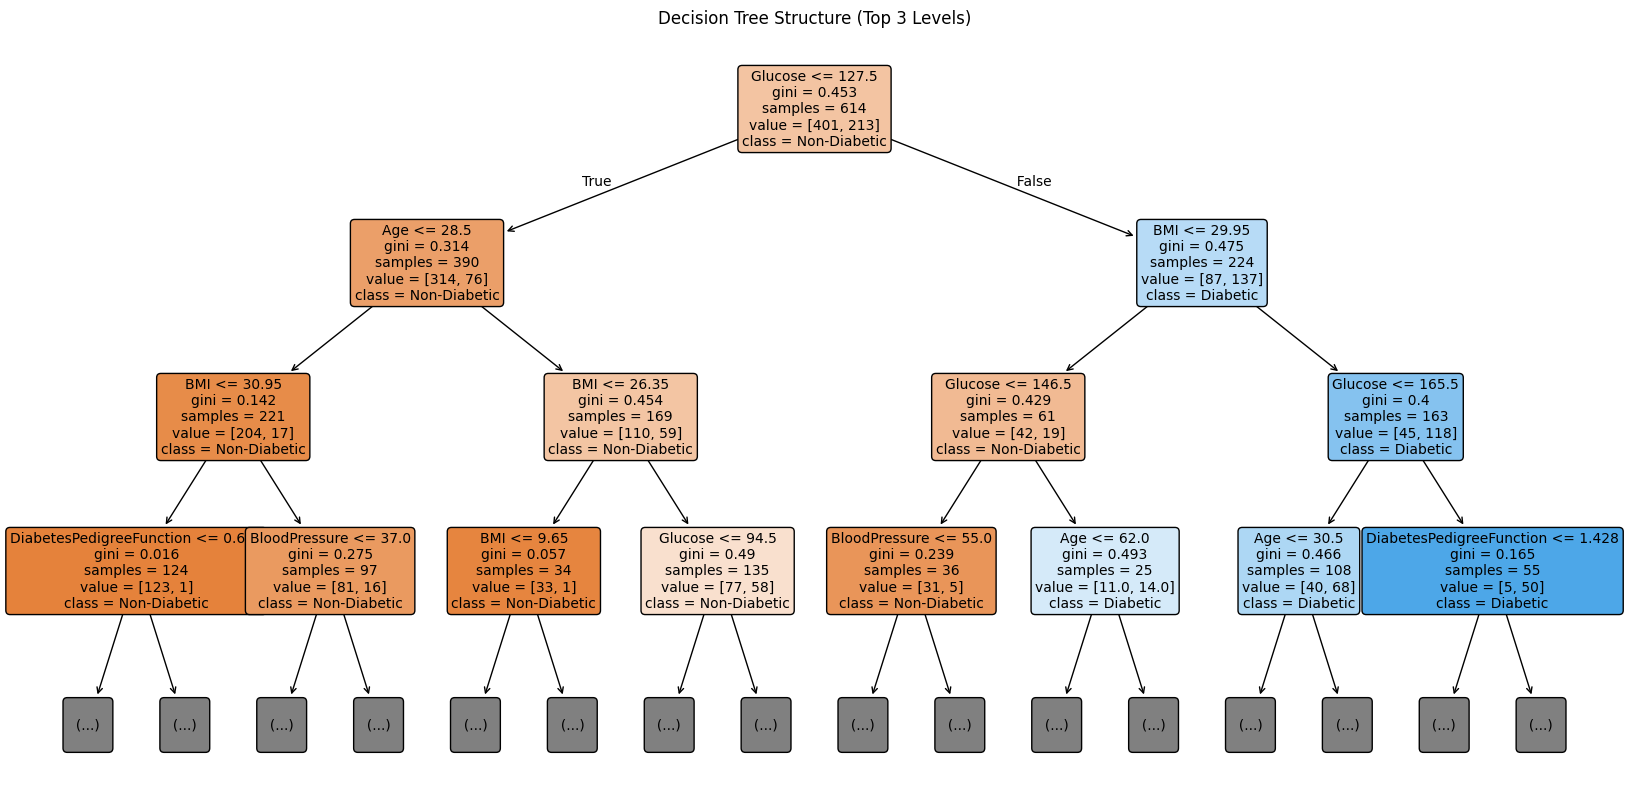

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth to 3 levels for clarity
          fontsize=10)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

Random Forest Classifier

In [45]:
# Separate features (X) and the target variable (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# Create and train the Random Forest model
rf_model_unaltered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_unaltered.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions on the test data
y_pred_rf = rf_model_unaltered.predict(X_test)
y_proba_rf = rf_model_unaltered.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("--- Random Forest Evaluation (Unaltered Data) ---")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

--- Random Forest Evaluation (Unaltered Data) ---

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[77 22]
 [21 34]]

Accuracy: 0.7207792207792207
ROC AUC Score: 0.8120293847566575


<class 'numpy.ndarray'>
(154, 8, 2)
(154, 8)

--- SHAP Feature Importance for Random Forest ---


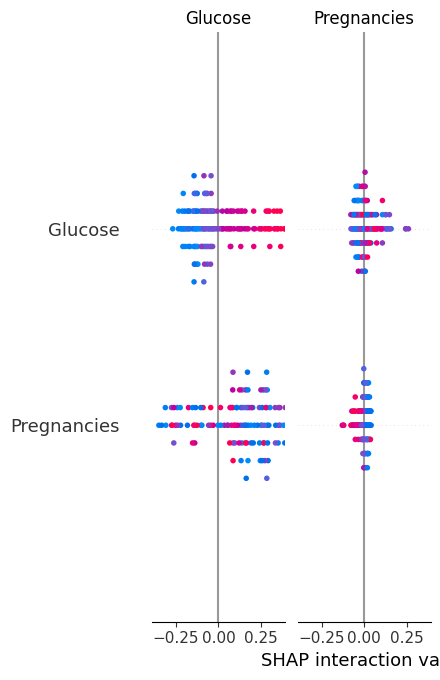

In [48]:
# Create a SHAP explainer for the Random Forest model
rf_explainer = shap.TreeExplainer(rf_model_unaltered)

# Calculate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(X_test)

# Check shape (optional debug step)
print(type(rf_shap_values))
print(np.array(rf_shap_values).shape)
print(X_test.shape)

# Plot the SHAP summary (no index if binary classification)
print("\n--- SHAP Feature Importance for Random Forest ---")
shap.summary_plot(rf_shap_values, X_test)

plt.show()


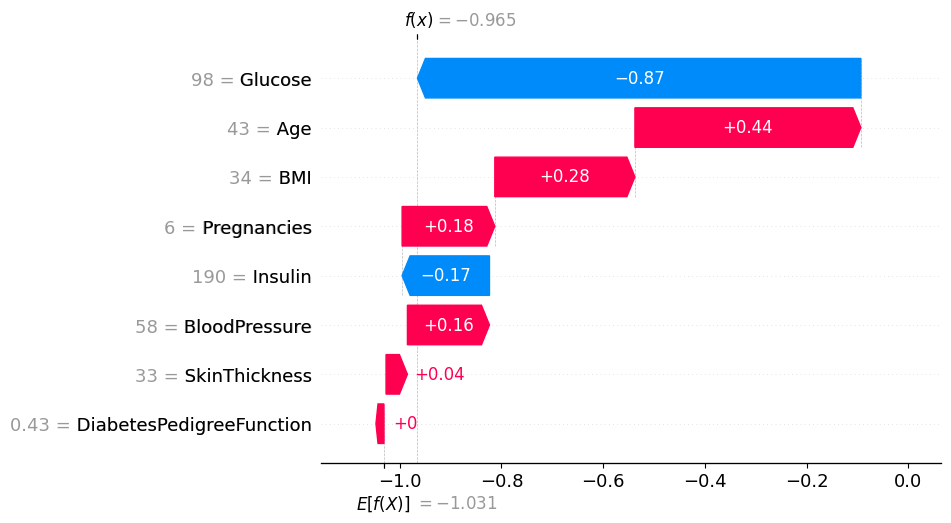

In [49]:
shap.plots.waterfall(shap_values[0])

# Optional: use plt.show() to ensure display in some environments
plt.show()

Implementing XGBoost

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:10:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Classification Report
print("\n XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7337662337662337
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1 Score: 0.616822429906542
ROC AUC: 0.8051851851851852

 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



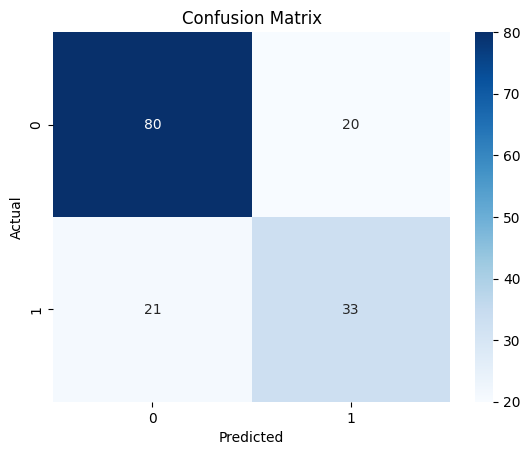

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


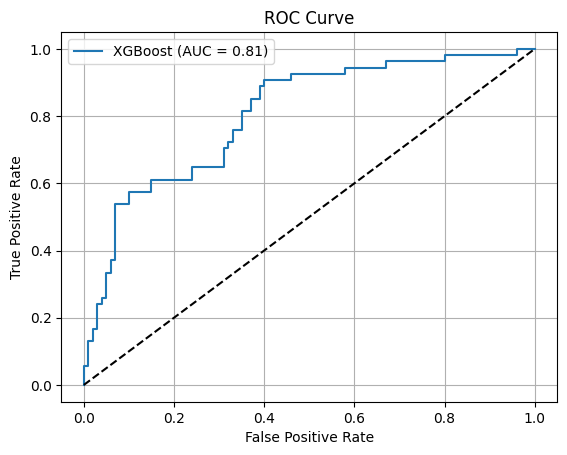

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


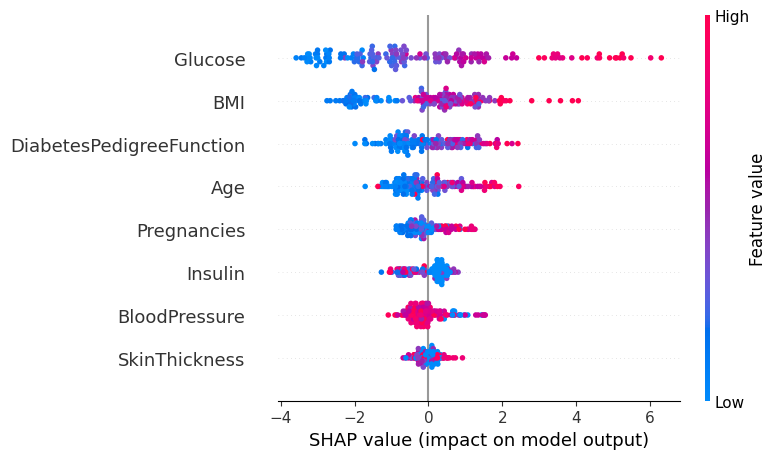

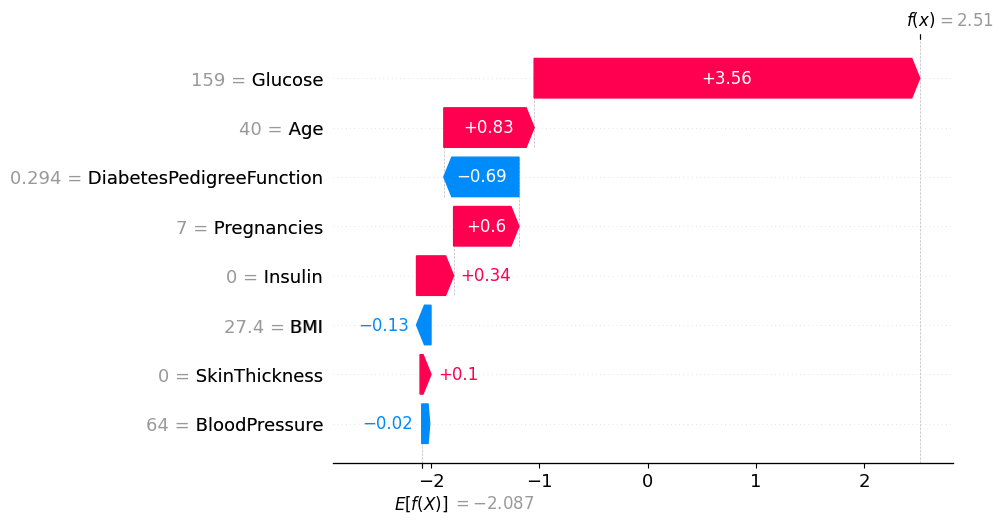

In [55]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)

# Waterfall plot for a single instance
shap.plots.waterfall(shap_values[0])


In [56]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

# Implementation of TabNet Classifier

In [57]:
!rm -rf /usr/local/lib/python3.11/dist-packages/~etworkx*


In [58]:
!pip uninstall -y networkx
!pip install networkx==2.8.8


Found existing installation: networkx 2.8.8
Uninstalling networkx-2.8.8:
  Successfully uninstalled networkx-2.8.8
  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)


In [59]:
!pip uninstall -y scikit-image nx-cugraph-cu12


In [60]:
tabnet_clf2 = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,       # width of decision and attention layers, and number of decision steps
    gamma=1.3,                    # feature reuse penalty (default 1.3)
    lambda_sparse=1e-3,           # sparsity regularization to encourage feature selection
    optimizer_params=dict(lr=2e-2)
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [61]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Define and train the model
tabnet_clf = TabNetClassifier(seed=42)

tabnet_clf2.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['val'],
    eval_metric=['auc'],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.05286 | val_auc: 0.55037 |  0:00:00s
epoch 1  | loss: 0.8446  | val_auc: 0.57259 |  0:00:00s
epoch 2  | loss: 0.70801 | val_auc: 0.63907 |  0:00:00s
epoch 3  | loss: 0.63512 | val_auc: 0.62963 |  0:00:00s
epoch 4  | loss: 0.58696 | val_auc: 0.68796 |  0:00:00s
epoch 5  | loss: 0.56515 | val_auc: 0.72259 |  0:00:00s
epoch 6  | loss: 0.53408 | val_auc: 0.74296 |  0:00:00s
epoch 7  | loss: 0.52837 | val_auc: 0.75389 |  0:00:00s
epoch 8  | loss: 0.51699 | val_auc: 0.76259 |  0:00:00s
epoch 9  | loss: 0.52168 | val_auc: 0.76704 |  0:00:00s
epoch 10 | loss: 0.53011 | val_auc: 0.76815 |  0:00:00s
epoch 11 | loss: 0.51022 | val_auc: 0.74111 |  0:00:00s
epoch 12 | loss: 0.51321 | val_auc: 0.765   |  0:00:00s
epoch 13 | loss: 0.49589 | val_auc: 0.76463 |  0:00:01s
epoch 14 | loss: 0.4846  | val_auc: 0.77315 |  0:00:01s
epoch 15 | loss: 0.488   | val_auc: 0.77685 |  0:00:01s
epoch 16 | loss: 0.4675  | val_auc: 0.77574 |  0:00:01s
epoch 17 | loss: 0.46938 | val_auc: 0.77148 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.7012987012987013
Precision: 0.5769230769230769
Recall: 0.5555555555555556
F1 Score: 0.5660377358490566
AUC: 0.7768518518518519
R² Score: 0.16780978441238403

Confusion Matrix:
 [[78 22]
 [24 30]]

TabNet Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.58      0.56      0.57        54

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



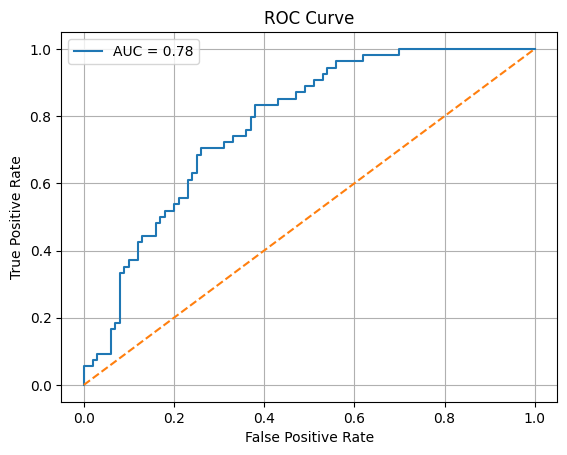

In [62]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities and class labels
probs = tabnet_clf2.predict_proba(X_test)[:, 1]  # probability of the positive class
preds = (probs >= 0.5).astype(int)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, probs))
print("R² Score:", r2_score(y_test, probs))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nTabNet Classification Report:\n", classification_report(y_test, preds))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
df_faircut = faircut_impute(df)
df_faircut.head(10)

X_faircut = df_faircut.drop("Outcome", axis=1).values.astype(np.float32)
y_faircut = df_faircut["Outcome"].values.astype(np.float32)

X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut = train_test_split(
    X_faircut, y_faircut, test_size=0.2, stratify=y_faircut, random_state=42
)

improvised Tabnet

In [64]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Scale the input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convert to int for TabNet
y_train_np = np.array(y_train).astype(int)
y_test_np = np.array(y_test).astype(int)

# Compute class weights to handle imbalance
classes = np.unique(y_train_np)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_np)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Convert to PyTorch tensor (optional for GPU later)
weights_array = np.vectorize(class_weights_dict.get)(y_train_np)

# Define TabNet Classifier
tabnet_clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',  # better for interpretability than 'sparsemax'
    seed=42,
    verbose=10
)

# Fit the model
tabnet_clf.fit(
    X_train=X_train, y_train=y_train_np,
    eval_set=[(X_train, y_train_np), (X_test, y_test_np)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,               # Smaller batch size helps TabNet generalize better
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83016 | train_auc: 0.75166 | train_accuracy: 0.57492 | val_auc: 0.705   | val_accuracy: 0.59091 |  0:00:00s
epoch 10 | loss: 0.53934 | train_auc: 0.85037 | train_accuracy: 0.7557  | val_auc: 0.80759 | val_accuracy: 0.70779 |  0:00:08s
epoch 20 | loss: 0.48422 | train_auc: 0.87294 | train_accuracy: 0.78664 | val_auc: 0.80611 | val_accuracy: 0.74026 |  0:00:17s
epoch 30 | loss: 0.45692 | train_auc: 0.88315 | train_accuracy: 0.79805 | val_auc: 0.82    | val_accuracy: 0.76623 |  0:00:25s
epoch 40 | loss: 0.47269 | train_auc: 0.89266 | train_accuracy: 0.79479 | val_auc: 0.81463 | val_accuracy: 0.71429 |  0:00:31s
epoch 50 | loss: 0.45516 | train_auc: 0.90439 | train_accuracy: 0.81107 | val_auc: 0.81963 | val_accuracy: 0.75974 |  0:00:36s
epoch 60 | loss: 0.46229 | train_auc: 0.91266 | train_accuracy: 0.82085 | val_auc: 0.80889 | val_accuracy: 0.73377 |  0:00:45s

Early stopping occurred at epoch 67 with best_epoch = 37 and best_val_accuracy = 0.79221


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = tabnet_clf.predict(X_test)
y_proba = tabnet_clf.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_np, y_proba))


[[78 22]
 [10 44]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.67      0.81      0.73        54

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154

ROC AUC Score: 0.8322222222222222


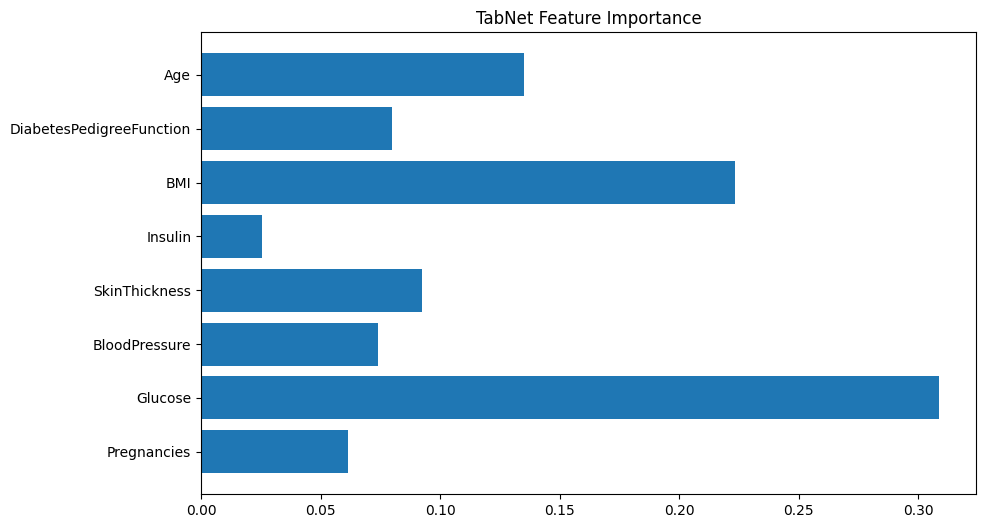

In [66]:
import matplotlib.pyplot as plt
feature_names = X.columns.tolist()

# Plot feature importance
tabnet_clf.explain_weights_ = tabnet_clf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(tabnet_clf.explain_weights_)), tabnet_clf.explain_weights_)
plt.yticks(range(len(feature_names)), feature_names)
plt.title("TabNet Feature Importance")
plt.show()


TabNet After FairCut

In [67]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# === 1. Scale faircut features ===
scaler = StandardScaler()
X_train_faircut = scaler.fit_transform(X_train_faircut).astype(np.float32)
X_test_faircut = scaler.transform(X_test_faircut).astype(np.float32)

# === 2. Convert labels to int ===
y_train_fc = np.array(y_train_faircut).astype(int)
y_test_fc = np.array(y_test_faircut).astype(int)

# === 3. Compute class weights ===
classes = np.unique(y_train_fc)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_fc)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
weights_array = np.vectorize(class_weights_dict.get)(y_train_fc)

# === 4. Define TabNet Classifier ===
tabnet_clf_fc = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === 5. Train TabNet ===
tabnet_clf_fc.fit(
    X_train=X_train_faircut, y_train=y_train_fc,
    eval_set=[(X_train_faircut, y_train_fc), (X_test_faircut, y_test_fc)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68203 | train_auc: 0.75507 | train_accuracy: 0.73941 | val_auc: 0.69648 | val_accuracy: 0.66883 |  0:00:00s
epoch 10 | loss: 0.50835 | train_auc: 0.86376 | train_accuracy: 0.79153 | val_auc: 0.80667 | val_accuracy: 0.72727 |  0:00:09s
epoch 20 | loss: 0.49606 | train_auc: 0.88033 | train_accuracy: 0.79967 | val_auc: 0.81315 | val_accuracy: 0.71429 |  0:00:15s
epoch 30 | loss: 0.47973 | train_auc: 0.88754 | train_accuracy: 0.79479 | val_auc: 0.82241 | val_accuracy: 0.74026 |  0:00:19s
epoch 40 | loss: 0.46927 | train_auc: 0.89279 | train_accuracy: 0.81922 | val_auc: 0.83259 | val_accuracy: 0.77273 |  0:00:22s
epoch 50 | loss: 0.4464  | train_auc: 0.89783 | train_accuracy: 0.80945 | val_auc: 0.835   | val_accuracy: 0.76623 |  0:00:25s
epoch 60 | loss: 0.44702 | train_auc: 0.90487 | train_accuracy: 0.82248 | val_auc: 0.83667 | val_accuracy: 0.77273 |  0:00:28s
epoch 70 | loss: 0.43773 | train_auc: 0.91446 | train_accuracy: 0.82085 | val_auc: 0.81463 | val_accuracy: 0.72

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [68]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# === Predictions ===
y_pred_fc = tabnet_clf_fc.predict(X_test_faircut)
y_proba_fc = tabnet_clf_fc.predict_proba(X_test_faircut)[:, 1]

# === Metrics ===
print("Confusion Matrix:\n", confusion_matrix(y_test_fc, y_pred_fc))
print("\nClassification Report:\n", classification_report(y_test_fc, y_pred_fc))
print("Accuracy:", accuracy_score(y_test_fc, y_pred_fc))
print("Precision:", precision_score(y_test_fc, y_pred_fc))
print("Recall:", recall_score(y_test_fc, y_pred_fc))
print("F1 Score:", f1_score(y_test_fc, y_pred_fc))
print("ROC AUC:", roc_auc_score(y_test_fc, y_proba_fc))


Confusion Matrix:
 [[79 21]
 [13 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       100
           1       0.66      0.76      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154

Accuracy: 0.7792207792207793
Precision: 0.6612903225806451
Recall: 0.7592592592592593
F1 Score: 0.7068965517241379
ROC AUC: 0.8035185185185185


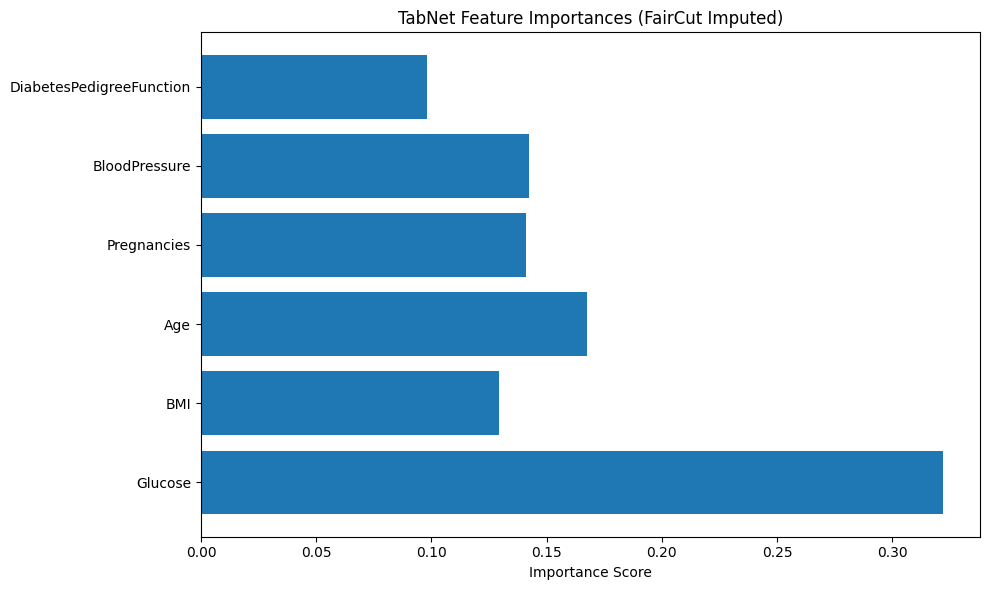

In [69]:
import matplotlib.pyplot as plt

# Names of the 6 features you kept
feature_names = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
importances = tabnet_clf_fc.feature_importances_

# Bar chart
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("TabNet Feature Importances (FairCut Imputed)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


SHAP Analysis TabNet

  0%|          | 0/5 [00:00<?, ?it/s]

IndexError: list index out of range

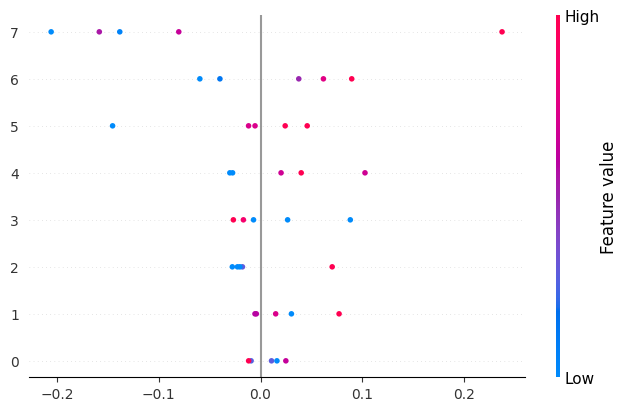

In [70]:
import shap
import torch
import numpy as np

# Define SHAP-compatible predict function
def predict_fn(x_np):
    with torch.no_grad():
        x_tensor = torch.tensor(x_np, dtype=torch.float32)
        return tabnet_clf2.predict_proba(x_tensor.numpy())[:, 1]

# Background and sample data (use small sizes)
X_bg = X_train[:100]
X_sample = X_test[:5]

# Create explainer and compute SHAP values
explainer = shap.KernelExplainer(predict_fn, X_bg)
shap_values = explainer.shap_values(X_sample)

# Feature names
feature_names = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI', 'dpf']

# Summary plot
shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

# Force plot for one instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_sample[0], feature_names=feature_names)


# Implementation of FT Transformer

In [72]:
pip install rtdl pytorch-tabular


In [73]:
!pip install rtdl==0.0.13


ERROR: Operation cancelled by user


In [71]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


1.13.1+cu117
False


In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install --upgrade --force-reinstall torch torchvision torchaudio


Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.8.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.23.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.8.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (7.2 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 571.0/571.0 MB 166.9 MB/s eta 0:00:01^C


In [ ]:
from inspect import signature
from rtdl import FTTransformer
print(signature(FTTransformer.make_default))


In [1]:
# === 1. Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer
import pandas as pd
import numpy as np

# === 2. Load and preprocess ===
df = pd.read_csv("diabetes.csv")  # path to your dataset
X = df.drop("Outcome", axis=1).values.astype(np.float32)
y = df["Outcome"].values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# === 3. DataLoaders ===
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test), torch.tensor(y_test).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=32, num_workers=0)

# === 4. Define model ===
model = FTTransformer.make_default(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,  # No categorical features
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 5. Training ===
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 25

model.train()
for epoch in range(n_epochs):
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)  # <-- fixed line
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.4f}")

# === 6. Evaluation ===
model.eval()
all_probs, all_preds, all_labels = [], [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()  # <-- fixed line
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 7. Metrics ===
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))
print("\nConfusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nFT Transformer Classification Report:\n", classification_report(all_labels, all_preds))


Epoch 1/25, Loss: 11.6761
Epoch 2/25, Loss: 10.7330
Epoch 3/25, Loss: 9.6603
Epoch 4/25, Loss: 9.1733
Epoch 5/25, Loss: 9.3019
Epoch 6/25, Loss: 8.9744
Epoch 7/25, Loss: 9.3498
Epoch 8/25, Loss: 8.8538
Epoch 9/25, Loss: 8.9035
Epoch 10/25, Loss: 9.2362
Epoch 11/25, Loss: 8.6205
Epoch 12/25, Loss: 8.7132
Epoch 13/25, Loss: 8.4867
Epoch 14/25, Loss: 9.0055
Epoch 15/25, Loss: 8.8460
Epoch 16/25, Loss: 8.7000
Epoch 17/25, Loss: 8.7334
Epoch 18/25, Loss: 8.7925
Epoch 19/25, Loss: 9.3762
Epoch 20/25, Loss: 8.5079
Epoch 21/25, Loss: 8.9474
Epoch 22/25, Loss: 7.9788
Epoch 23/25, Loss: 8.4577
Epoch 24/25, Loss: 8.4521
Epoch 25/25, Loss: 8.6548
Accuracy: 0.7402597402597403
Precision: 0.6458333333333334
Recall: 0.5740740740740741
F1 Score: 0.6078431372549019
AUC: 0.7798148148148147
R² Score: 0.19448677670880665

Confusion Matrix:
 [[83 17]
 [23 31]]

FT Transformer Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       100


In [ ]:
pip install --upgrade rtdl


Improvised FTTransformer

In [2]:
# === 1. Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer  # <-- only this works in your setup
import pandas as pd
import numpy as np

# === 2. Load & Preprocess Data ===
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1).values.astype(np.float32)
y = df["Outcome"].values.astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, stratify=y_train_full, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# === 3. Dataloaders ===
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train).unsqueeze(1))
val_ds = TensorDataset(torch.tensor(X_val), torch.tensor(y_val).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test), torch.tensor(y_test).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# === 4. Define FTTransformer with default config ===
model = FTTransformer.make_default(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 5. Weighted Loss + Optimizer ===
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

# === 6. Training with Early Stopping ===
best_val_auc = 0
best_model_state = None
patience = 10
counter = 0

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    # Validation
    model.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb, x_cat=None).squeeze()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(yb.squeeze().numpy())
    val_auc = roc_auc_score(all_labels, all_probs)
    print(f"Epoch {epoch+1}, Val AUC: {val_auc:.4f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# === 7. Load Best Model & Evaluate on Test Set ===
model.load_state_dict(best_model_state)
model.eval()

all_probs, all_preds, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 8. Print Final Metrics ===
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nClassification Report:\n", classification_report(all_labels, all_preds))
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("ROC AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))


Epoch 1, Val AUC: 0.8614
Epoch 2, Val AUC: 0.8761
Epoch 3, Val AUC: 0.8511
Epoch 4, Val AUC: 0.8489
Epoch 5, Val AUC: 0.8364
Epoch 6, Val AUC: 0.8557
Epoch 7, Val AUC: 0.8534
Epoch 8, Val AUC: 0.8375
Epoch 9, Val AUC: 0.7841
Epoch 10, Val AUC: 0.8034
Epoch 11, Val AUC: 0.8341
Epoch 12, Val AUC: 0.8409
Early stopping.
Confusion Matrix:
 [[75 25]
 [14 40]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       100
         1.0       0.62      0.74      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy: 0.7467532467532467
Precision: 0.6153846153846154
Recall: 0.7407407407407407
F1 Score: 0.6722689075630253
ROC AUC: 0.8129629629629629
R² Score: 0.2175359707633301


FairCut FTTransformer

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer
import numpy as np

# === 1. Prepare FairCut-Imputed Data ===

# Already done earlier:
# X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut

# Split off validation set
X_train_fc, X_val_fc, y_train_fc, y_val_fc = train_test_split(
    X_train_faircut, y_train_faircut, test_size=0.1, stratify=y_train_faircut, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_fc = scaler.fit_transform(X_train_fc)
X_val_fc = scaler.transform(X_val_fc)
X_test_fc = scaler.transform(X_test_faircut)

# Convert to tensors and create dataloaders
train_ds = TensorDataset(torch.tensor(X_train_fc), torch.tensor(y_train_fc).unsqueeze(1))
val_ds = TensorDataset(torch.tensor(X_val_fc), torch.tensor(y_val_fc).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test_fc), torch.tensor(y_test_faircut).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# === 2. Define FTTransformer ===
model = FTTransformer.make_default(
    n_num_features=X_train_fc.shape[1],
    cat_cardinalities=None,
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 3. Weighted Loss + Optimizer ===
pos_weight = (y_train_fc == 0).sum() / (y_train_fc == 1).sum()
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

# === 4. Training with Early Stopping ===
best_val_auc = 0
best_model_state = None
patience = 10
counter = 0

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    # Validation
    model.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb, x_cat=None).squeeze()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(yb.squeeze().numpy())
    val_auc = roc_auc_score(all_labels, all_probs)
    print(f"Epoch {epoch+1}, Val AUC: {val_auc:.4f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# === 5. Load Best Model & Evaluate on Test Set ===
model.load_state_dict(best_model_state)
model.eval()

all_probs, all_preds, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 6. Final Metrics ===
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nClassification Report:\n", classification_report(all_labels, all_preds))
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("ROC AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))


Epoch 1, Val AUC: 0.8648
Epoch 2, Val AUC: 0.8523
Epoch 3, Val AUC: 0.8568
Epoch 4, Val AUC: 0.8602
Epoch 5, Val AUC: 0.8534
Epoch 6, Val AUC: 0.8739
Epoch 7, Val AUC: 0.8557
Epoch 8, Val AUC: 0.8557
Epoch 9, Val AUC: 0.8330
Epoch 10, Val AUC: 0.8159
Epoch 11, Val AUC: 0.8591
Epoch 12, Val AUC: 0.8580
Epoch 13, Val AUC: 0.8477
Epoch 14, Val AUC: 0.8307
Epoch 15, Val AUC: 0.8398
Epoch 16, Val AUC: 0.8341
Early stopping.
Confusion Matrix:
 [[75 25]
 [12 42]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       100
         1.0       0.63      0.78      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

Accuracy: 0.7597402597402597
Precision: 0.6268656716417911
Recall: 0.7777777777777778
F1 Score: 0.6942148760330579
ROC AUC: 0.8183333333333334
R² Score: 0.21354326195588424


In [ ]:
pip install rtdl pytorch-tabular